# Lab: Association Rules

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [43]:
pd.set_option('display.max_columns', 75) # Tells pandas to show up to 75 columns when displaying a DataFrame (instead of hiding with ...)

<a id='1'></a>
## 1. Apriori


Firstly, you will load the first dataset for this lab into a DataFrame `df`. The dataset is stored in the csv file from the following path `"Groceries data.csv"`. Then you will encode the dataset into a transactional dataset, apply the **Apriori** algorithm to extract the **frequent itemsets**, and generate the **association rules**.

In [44]:
df = pd.read_csv("data/Groceries data.csv")
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [45]:
df.drop_duplicates(inplace=True) # Dropping the duplicates
print(f"There are {len(df)} samples in the dataset.")

There are 38006 samples in the dataset.


Now, let's plot the most frequent 10 items.

Index(['itemDescription', 'count'], dtype='object')


<Figure size 750x450 with 0 Axes>

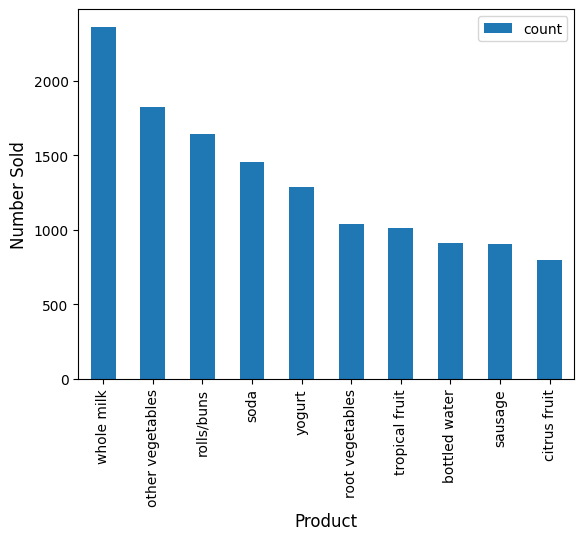

In [46]:
plt.figure(figsize=(5, 3), dpi=150)

# Check column names after reset_index()
df_counts = df.itemDescription.value_counts(ascending=False).reset_index() # itemDescription is a column, reset_index it to add a column as
                                                                           # index (0,1..) instead of the itemDescription'elment as index

# Print column names
print(df_counts.columns)

# Assuming the new column name is 'itemDescription' (replace it with the correct name)
df_counts.head(10).plot(kind='bar', x='itemDescription')

plt.xlabel('Product', size=12)
plt.ylabel('Number Sold', size=12)
plt.show()

### Exercise 1.1
You will first create a transactional DataFrame. You want to analyze each product bought by a member on each date. However, the items bought are one in each row. Therefore, you should group all the items bought by a member on a given date with the groupby operation provided in Pandas. We didn't cover this kind of operation so far. The code is already provided to you.

The next cell creates a DataFrame of **transactions**. Specifically, it **groups all the items** for each `Member_number` and `Date` into a **list of items** in a new column `transaction`.

In [47]:
#### START CODE HERE ####
#### Approximately 1 line ####
df_transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='transaction')
#### END CODE HERE #### 

df_transactions.head()

,Member_number,Date,transaction
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned juice, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"


In [48]:
print("Number of transactions:", len(df_transactions))
print("Number of distinct customers:", len(list(set(df_transactions["Member_number"]))))

Number of transactions: 14963
Number of distinct customers: 3898


### Exercise 1.2

Create a list containing all the transactions (i.e., list of list of items) into a variable `transactions`. Remember that all the transactions are stored in the `transaction` column of the DataFrame `df_transactions`. 


In [49]:
#### START CODE HERE ####
#### Approximately 1 line ####
transactions = df_transactions['transaction'].tolist()
#### END CODE HERE ####

transactions[:5]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned juice', 'misc. beverages'],
 ['sausage', 'hygiene articles']]

### Exercise 1.3

Encode the transactions into a **one-hot encoded transactional dataset**. Store the encoded dataset into a variable called `transaction_dataset`. You should first create a TransactionEncoder() object and then, call the fit_transform() method on your transactions (stored in the `transactions` variable).

In [50]:
#### START CODE HERE ####
#### Approximately 2 line ####
te = TransactionEncoder()
transaction_dataset = te.fit_transform(transactions)
#### END CODE HERE ####

transaction_dataset

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(14963, 167))

### Exercise 1.4

Now, let's create a DataFrame from the one-hot encoded `transaction_dataset` and store the dataframe in a variable `df_transactions_onehot`. Set the columns of the dataframe to the `transaction_encoder.columns_` values.

In [51]:
#### START CODE HERE ####
#### Approximately 1 line ####
df_transactions_onehot = pd.DataFrame(transaction_dataset, columns=te.columns_)

#### END CODE HERE ####

df_transactions_onehot.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled juice,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned fish,canned fruit,canned juice,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,...,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Exercise 1.5

Apply the **Apriori** algorithm on the datasted stored in `df_transactions_onehot`. Set the value of the minimum support `min_support` to 0.01 and the value of the parameter `use_colnames` to `True`. Replace `None` with your code.

In [52]:
#### START CODE HERE ####
#### Approximately 1 line ####
df_freq_itemsets = apriori(df_transactions_onehot, min_support=0.01, use_colnames=True)
#### END CODE HERE ####

df_freq_itemsets

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled juice)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
65,0.014837,"(whole milk, other vegetables)"
66,0.013968,"(whole milk, rolls/buns)"
67,0.011629,"(whole milk, soda)"


Run the next cell to create a new column with the length of each transaction (i.e., the number of elements in each transaction).

In [53]:
df_freq_itemsets['length'] = df_freq_itemsets['itemsets'].apply(lambda x: len(x))
df_freq_itemsets

,support,itemsets,length
0,0.021386,(UHT-milk),1
1,0.033950,(beef),1
2,0.021787,(berries),1
3,0.016574,(beverages),1
4,0.045312,(bottled juice),1
...,...,...,...
64,0.010559,"(rolls/buns, other vegetables)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.013968,"(whole milk, rolls/buns)",2
67,0.011629,"(whole milk, soda)",2


### Exercise 1.6

Print the frequents itemset with length equal to 2 (stored in `df_freq_itemsets`). You can use masking on the pandas array.

In [54]:
#### START CODE HERE ####
#### Approximately 1 line ####
df_freq_itemsets[ (df_freq_itemsets['length'] == 2) ]

#### END CODE HERE ####

,support,itemsets,length
64,0.010559,"(rolls/buns, other vegetables)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.013968,"(whole milk, rolls/buns)",2
67,0.011629,"(whole milk, soda)",2
68,0.011161,"(whole milk, yogurt)",2


### Exercise 1.7

Generate the association rules. Use `confidence` as metric and set the `min_threshold` to 0.01. Store the generated association rules in a DataFrame `df_ar`. Replace `None` with your code.

In [55]:
#### START CODE HERE ####
#### Approximately 1 line ####
df_rules_ap = association_rules(df_freq_itemsets, metric = 'confidence' , min_threshold = 0.01)

#### END CODE HERE ####

df_rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
2,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
3,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
6,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,1.0,-0.003707,0.974663,-0.274587,0.047776,-0.025995,0.096694
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,1.0,-0.003707,0.956636,-0.260917,0.047776,-0.045329,0.096694
8,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
9,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317


<a id='2'></a>
## 2. FP-Growth

In this exercise, you will have to generate association rules for another dataset. This time you will have to use the **FP-Growth** algorithm. However, the necessary steps are the same as in the previous exercise. This time, the exercise has no hints. Only the code for loading the dataset is provided. 

Please use the following parameter values: minimum support in frequent itemset generation 0.01 and minimum threshold in rule generation 0.05.


In [56]:
df = pd.read_csv("data/Basket.csv")

In [57]:
import csv
transactions = []
 

with open('data/Basket.csv') as file_obj:
    reader_obj = csv.reader(file_obj)
    count = 0
    for row in reader_obj:
        if count != 0:
            trasaction = [x for x in row if x != '']
            transactions.append(trasaction)
        count += 1

In [58]:
transactions[:2] # Print the first two transactions.

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']]

In [59]:
te = TransactionEncoder()
transaction_dataset = te.fit_transform(transactions) # already list of lists
df_transactions_onehot = pd.DataFrame(transaction_dataset, columns=te.columns_)

In [60]:
df_freq_itemsets_fp  = fpgrowth(df_transactions_onehot, min_support=0.01, use_colnames=True)
df_freq_itemsets_fp 

,support,itemsets
0,0.157923,(whole milk)
1,0.051728,(pastry)
2,0.018780,(salty snack)
3,0.085879,(yogurt)
4,0.060349,(sausage)
...,...,...
64,0.011161,"(whole milk, yogurt)"
65,0.011629,"(whole milk, soda)"
66,0.013968,"(whole milk, rolls/buns)"
67,0.010559,"(rolls/buns, other vegetables)"


In [61]:
df_rules_fp = association_rules(df_freq_itemsets_fp, metric='confidence', min_threshold=0.05)
df_rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
1,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
2,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,1.0,-0.003707,0.974663,-0.274587,0.047776,-0.025995,0.096694
3,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,1.0,-0.003707,0.956636,-0.260917,0.047776,-0.045329,0.096694
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,1.0,-0.003404,0.964550,-0.214986,0.055000,-0.036752,0.107711
6,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
7,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
8,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
9,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730


### Compare the rules obtained by `Apriori` and `FP-Growth`

In [62]:
print("Apriori rules:", len(df_rules_ap))
print("FP-Growth rules:", len(df_rules_fp))


Apriori rules: 10
FP-Growth rules: 10


In [63]:
common_rules = pd.merge(
    df_rules_ap,
    df_rules_fp,
    on=['antecedents', 'consequents'],
    suffixes=('_apriori', '_fpgrowth')
)

common_rules.head()


,antecedents,consequents,antecedent support_apriori,consequent support_apriori,support_apriori,confidence_apriori,lift_apriori,representativity_apriori,leverage_apriori,conviction_apriori,zhangs_metric_apriori,jaccard_apriori,certainty_apriori,kulczynski_apriori,antecedent support_fpgrowth,consequent support_fpgrowth,support_fpgrowth,confidence_fpgrowth,lift_fpgrowth,representativity_fpgrowth,leverage_fpgrowth,conviction_fpgrowth,zhangs_metric_fpgrowth,jaccard_fpgrowth,certainty_fpgrowth,kulczynski_fpgrowth
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235,0.110005,0.122101,0.010559,0.095990,0.786154,1.0,-0.002872,0.971117,-0.234091,0.047662,-0.029742,0.091235
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235,0.122101,0.110005,0.010559,0.086481,0.786154,1.0,-0.002872,0.974249,-0.236553,0.047662,-0.026432,0.091235
2,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730,0.157923,0.122101,0.014837,0.093948,0.769430,1.0,-0.004446,0.968928,-0.262461,0.055948,-0.032068,0.107730
3,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730,0.122101,0.157923,0.014837,0.121511,0.769430,1.0,-0.004446,0.958551,-0.254477,0.055948,-0.043241,0.107730
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711,0.157923,0.110005,0.013968,0.088447,0.804028,1.0,-0.003404,0.976350,-0.224474,0.055000,-0.024222,0.107711
